# dev 2

In [22]:
import numpy as np
import pandas as pd
import torch

import os
import sys
# Add the absolute path of the directory where ChemSelML is located to the python package search path
sys.path.append("/PyScripts/PyTorch.dir/Radical")

from ChemSelML.bin.ChemSelectivityDataset import ReactionDataset, SelectivityDataset

# '/PyScripts/PyTorch.dir/Radical/DataSet' corresponds to the "../DataSet" directory in this project.
# mode corresponds to the folder name in "../DataSet/raw"
dev2_ArR_dataset = ReactionDataset(root='/PyScripts/PyTorch.dir/Radical/DataSet', mode='dev_2')
print(dev2_ArR_dataset,'\n')
print(dev2_ArR_dataset.data,'\n')

dev2_ArR_DDG_dataset = SelectivityDataset(root='/PyScripts/PyTorch.dir/Radical/DataSet', mode='dev_2')
print(dev2_ArR_DDG_dataset,'\n')
print(dev2_ArR_DDG_dataset.data,'\n')

ReactionDataset(6114) 

Data(ArR_idx=[6114], Ar_ACSF=[85284, 23], Ar_ACSF_local=[6114, 16], Ar_BoB=[6114, 394], Ar_CM=[183420, 30], Ar_MACCSfp=[6114, 167], Ar_Morganfp=[6114, 512], Ar_PhyChem_local=[6114, 13], Ar_PhyChem_total=[6114, 10], Ar_SOAP=[6114, 5292], Ar_edge_attr=[1225206, 11], Ar_edge_index=[2, 1225206], Ar_mergefp=[6114, 679], Ar_pos=[85284, 3], Ar_x=[85284, 38], R_ACSF=[47704, 23], R_ACSF_local=[6114, 16], R_BoB=[6114, 122], R_CM=[183420, 30], R_MACCSfp=[6114, 167], R_Morganfp=[6114, 512], R_PhyChem_local=[6114, 9], R_PhyChem_total=[6114, 5], R_SOAP=[6114, 5292], R_edge_attr=[381524, 11], R_edge_index=[2, 381524], R_mergefp=[6114, 679], R_pos=[47704, 3], R_x=[47704, 38], y=[6114]) 

SelectivityDataset(9370) 

Data(ArR_sel_idx=[9370], Ar_ACSF=[133748, 23], Ar_ACSF_local@A=[9370, 16], Ar_ACSF_local@B=[9370, 16], Ar_BoB=[9370, 394], Ar_CM=[281100, 30], Ar_MACCSfp=[9370, 167], Ar_Morganfp=[9370, 512], Ar_PhyChem_local@A=[9370, 13], Ar_PhyChem_local@B=[9370, 13], Ar_PhyChem_tot

In [23]:
import importlib, sys, os
# Add the absolute path of the directory where ChemSelML is located to the python package search path
sys.path.append("/PyScripts/PyTorch.dir/Radical")

#importlib.reload(sys.modules['ChemSelML.train.ChemSelPredictor'])
#importlib.reload(sys.modules['ChemSelML.train.utils'])
from ChemSelML.train.ChemSelPredictor import ChemSel_Predictor
from ChemSelML.train.utils import plot_learning_curve
from ChemSelML.learners.Regressor import get_regressor_lib


In [24]:
model = get_regressor_lib('RF_R')
processed_dir = os.path.dirname(dev2_ArR_DDG_dataset.processed_paths[0])
predictor = ChemSel_Predictor(dev2_ArR_DDG_dataset, model=model, 
                               features=['PhyChem_total','PhyChem_local'], mode='DDG_R', n_jobs=14,
                               processed_dir=processed_dir, suffix='PhyChem@RF_Reg', reloadTimestamp=None)
# set reloadTimestamp='20200328_005339' could reload the trained model

X.shape:  (9370, 50)
20200329_093800
Cross Validation:
    ** R2  : 0.9541
    ** MAE  : 0.5521
    ** MSE  : 0.6659
Please input self.RFECV_Train() to start training model and get self.selector


In [15]:
predictor.RFECV_Train()


/PyScripts/PyTorch.dir/Radical/DataSet/processed/dev_2/models_pkg/20200328_005339/FinalModel_PhyChem@RF_Reg_20200328_005339.pkl


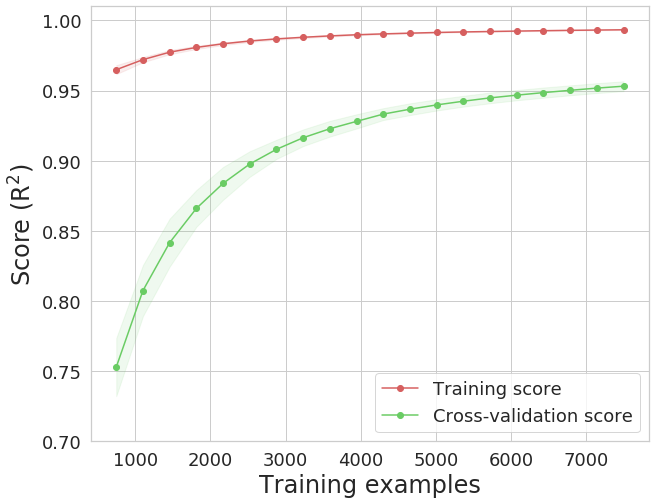

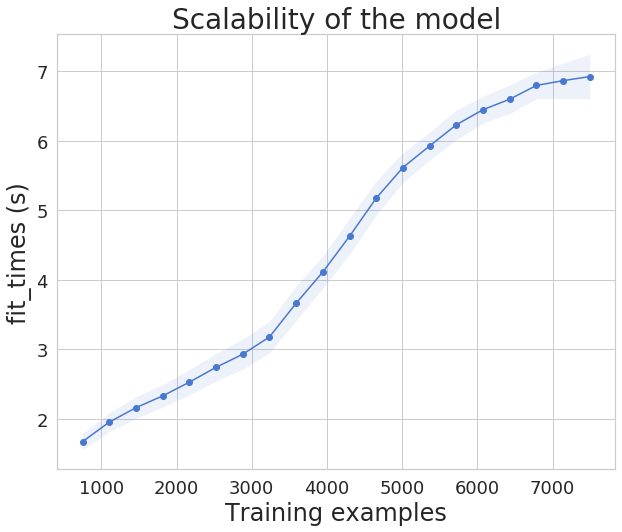

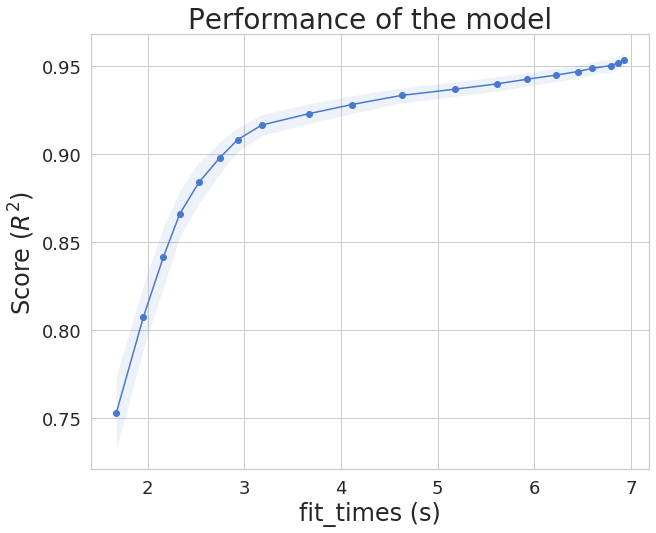

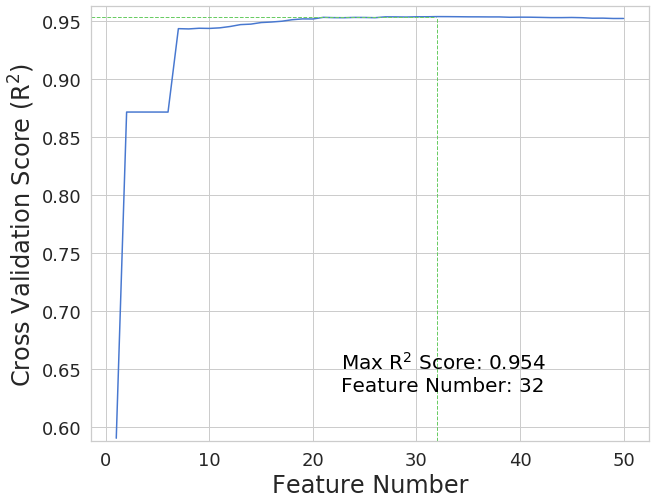

Feature number:  32
Max_R2_Score:  0.954221962593605


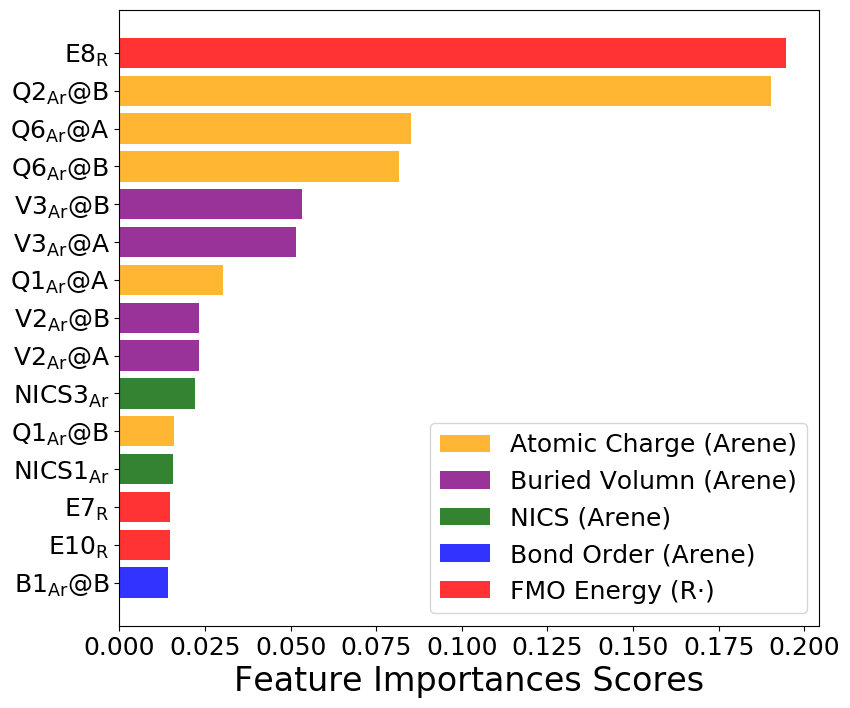

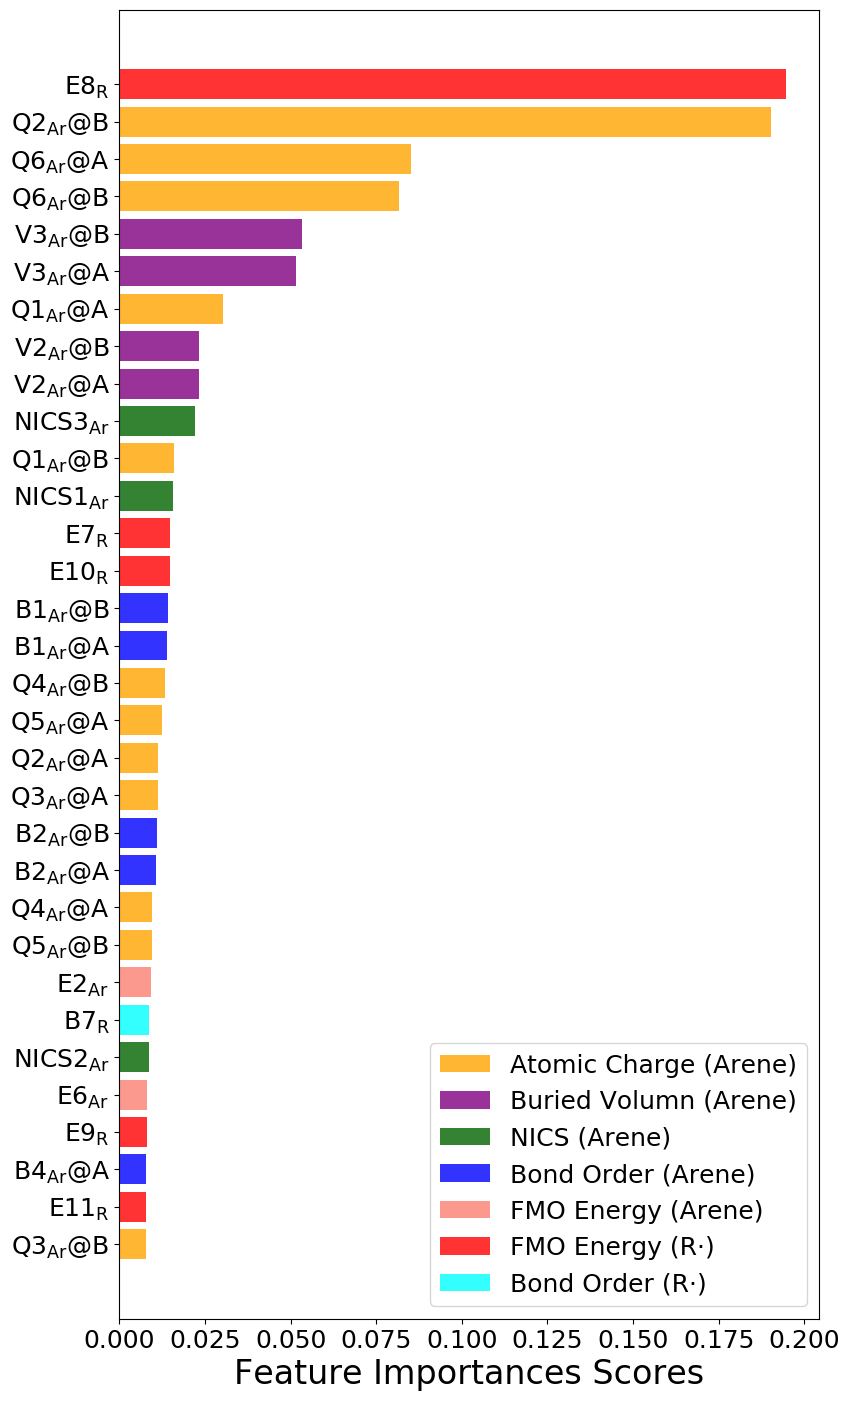

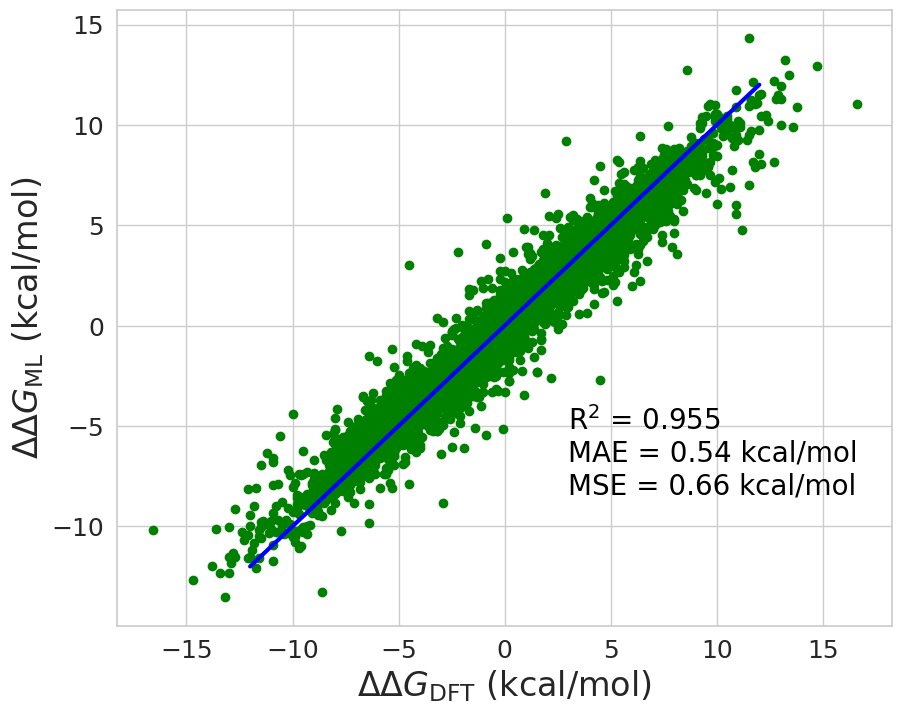

site_acc:  0.9378
degree_acc:  0.911


In [16]:
predictor.get_training_result(notitle=True)

In [17]:
predictor.save_to_pkl(predictor)

/PyScripts/PyTorch.dir/Radical/DataSet/processed/dev_2/models_pkg/Predictor_PhyChem@RF_Reg_20200328_005339.pkl


In [ ]:
predictor = predictor.load_from_pkl()

In [ ]:
sub_ArR_DDG_dataset = SelectivityDataset(root='/PyScripts/PyTorch.dir/Radical/DataSet', mode='test_sub')
print(sub_ArR_DDG_dataset,'\n')
print(sub_ArR_DDG_dataset.data,'\n')


In [ ]:
mark = "Sub"
dataset = sub_ArR_DDG_dataset
try:
    del predictor.test_pred
except:
    pass
predictor.get_test_result(test_dataset=dataset,suffix=mark,storage_folder='TestSet_%s'%mark)

# last